# Feline Classification Project

In [2]:
from duckduckgo_search import ddg_images
from fastcore.all import *
from fastdownload import download_url
from fastai.vision.all import *
from time import sleep

## Downloading the necesarry data and preparing it for the model

In [2]:
def search_images(term, max_images=200):
    return L(ddg_images(term, max_results=max_images)).itemgot('image')
    #Return a list of urls for images given a term)

Lets check if out function is properly working

In [3]:
urls = search_images('Cheetah photos', max_images=1)
urls[0] 

'https://www.rd.com/wp-content/uploads/2019/11/cheetah-1.jpg'

In [4]:
felines = 'lion', 'wildcat', 'cat', 'lynx', 'tiger', 'leopard', 'puma', 'cheetah', 'jaguar', 'panther', 'leopard'
path = Path('Dataset/feline_family')

Let's search and download images for some of the main feline species. 

In [5]:


for feline in felines:
    dest = (path/feline)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{feline} photo', max_images=100))
    sleep(10)
    resize_images(path/feline, max_size=400, dest=path/feline)

/home/juanhaunted/anaconda3/lib/python3.9/site-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/juanhaunted/anaconda3/lib/python3.9/site-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


## Now we are ready to load data into our model

First we need to remove downloads that did not work properly

In [6]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

10

In [24]:
?DataBlock

Init signature:
DataBlock(
    blocks: 'list' = None,
    dl_type: 'TfmdDL' = None,
    getters: 'list' = None,
    n_inp: 'int' = None,
    item_tfms: 'list' = None,
    batch_tfms: 'list' = None,
    *,
    get_items=None,
    splitter=None,
    get_y=None,
    get_x=None,
)
Docstring:      Generic container to quickly build `Datasets` and `DataLoaders`.
File:           ~/anaconda3/lib/python3.9/site-packages/fastai/data/block.py
Type:           type
Subclasses:     


We create our DataLoader and include augmentation option in order to get better results 

In [11]:
dls= DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(300, method='squish')],
    batch_tfms=aug_transforms(size=224)
).dataloaders(path)


dls.bs


64

It's recommended so see out batch in order to check that the data was properly loaded. 

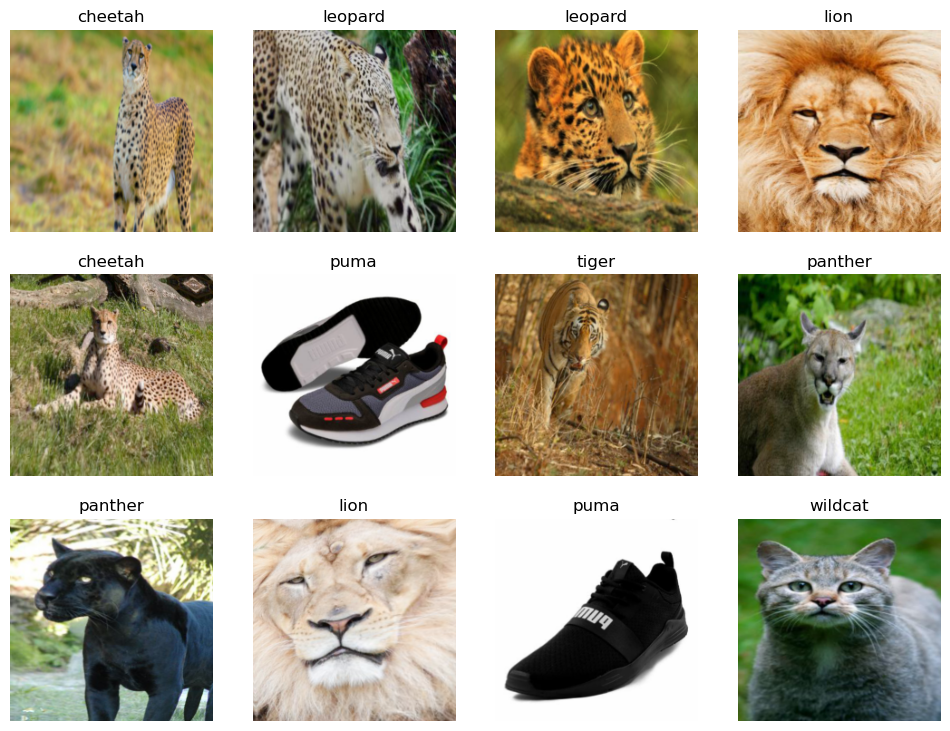

In [6]:
dls.show_batch(max_n=12)

## Now let's start the training

In [12]:
learn = vision_learner(dls, resnet18, metrics=error_rate)

We find optinal learning rate

SuggestedLRs(valley=0.0012022644514217973)

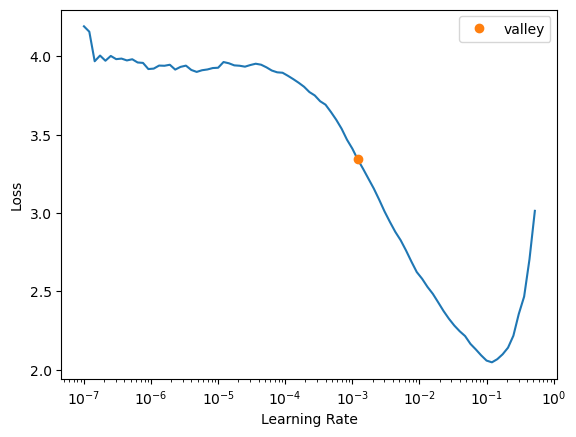

In [9]:
learn.lr_find()

In [14]:
learn.fine_tune(3, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,0.366820,0.469741,0.130435,00:05


epoch,train_loss,valid_loss,error_rate,time
0,0.332029,0.427961,0.149758,00:05
1,0.260239,0.444772,0.154589,00:05
2,0.207664,0.441508,0.154589,00:05


Now let's check how effective our model is

In [26]:
feline_type,_,probs = learn.predict(PILImage.create('manual_test/wild.jpg'))
print(f'This is a: {feline_type}')
#print(f'Chances: {probs[0]:.4f}')

This is a: wildcat
